In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx import DiGraph
import random

In [3]:
df = pd.read_csv("degree25000.csv", delim_whitespace = False, names = ("A", "B"))

G=nx.from_pandas_edgelist(df, "A", "B", create_using = DiGraph())

In [4]:
n = 1000
nodes = list(G.nodes)[:n]
twt_subgraph = G.subgraph(nodes)
print(twt_subgraph)

DiGraph with 1000 nodes and 54292 edges


In [5]:
# avg_degree
c = int(sum(dict(twt_subgraph.degree()).values()) / float(n))
print(c)

p = c/n
print(p)
# avg_path_length = nx.average_shortest_path_length(sub_graph.to_undirected())
# print(avg_path_length)

108
0.108


In [6]:
small_world_graph = nx.watts_strogatz_graph(n, c, p)
print(small_world_graph)

Graph with 1000 nodes and 54000 edges


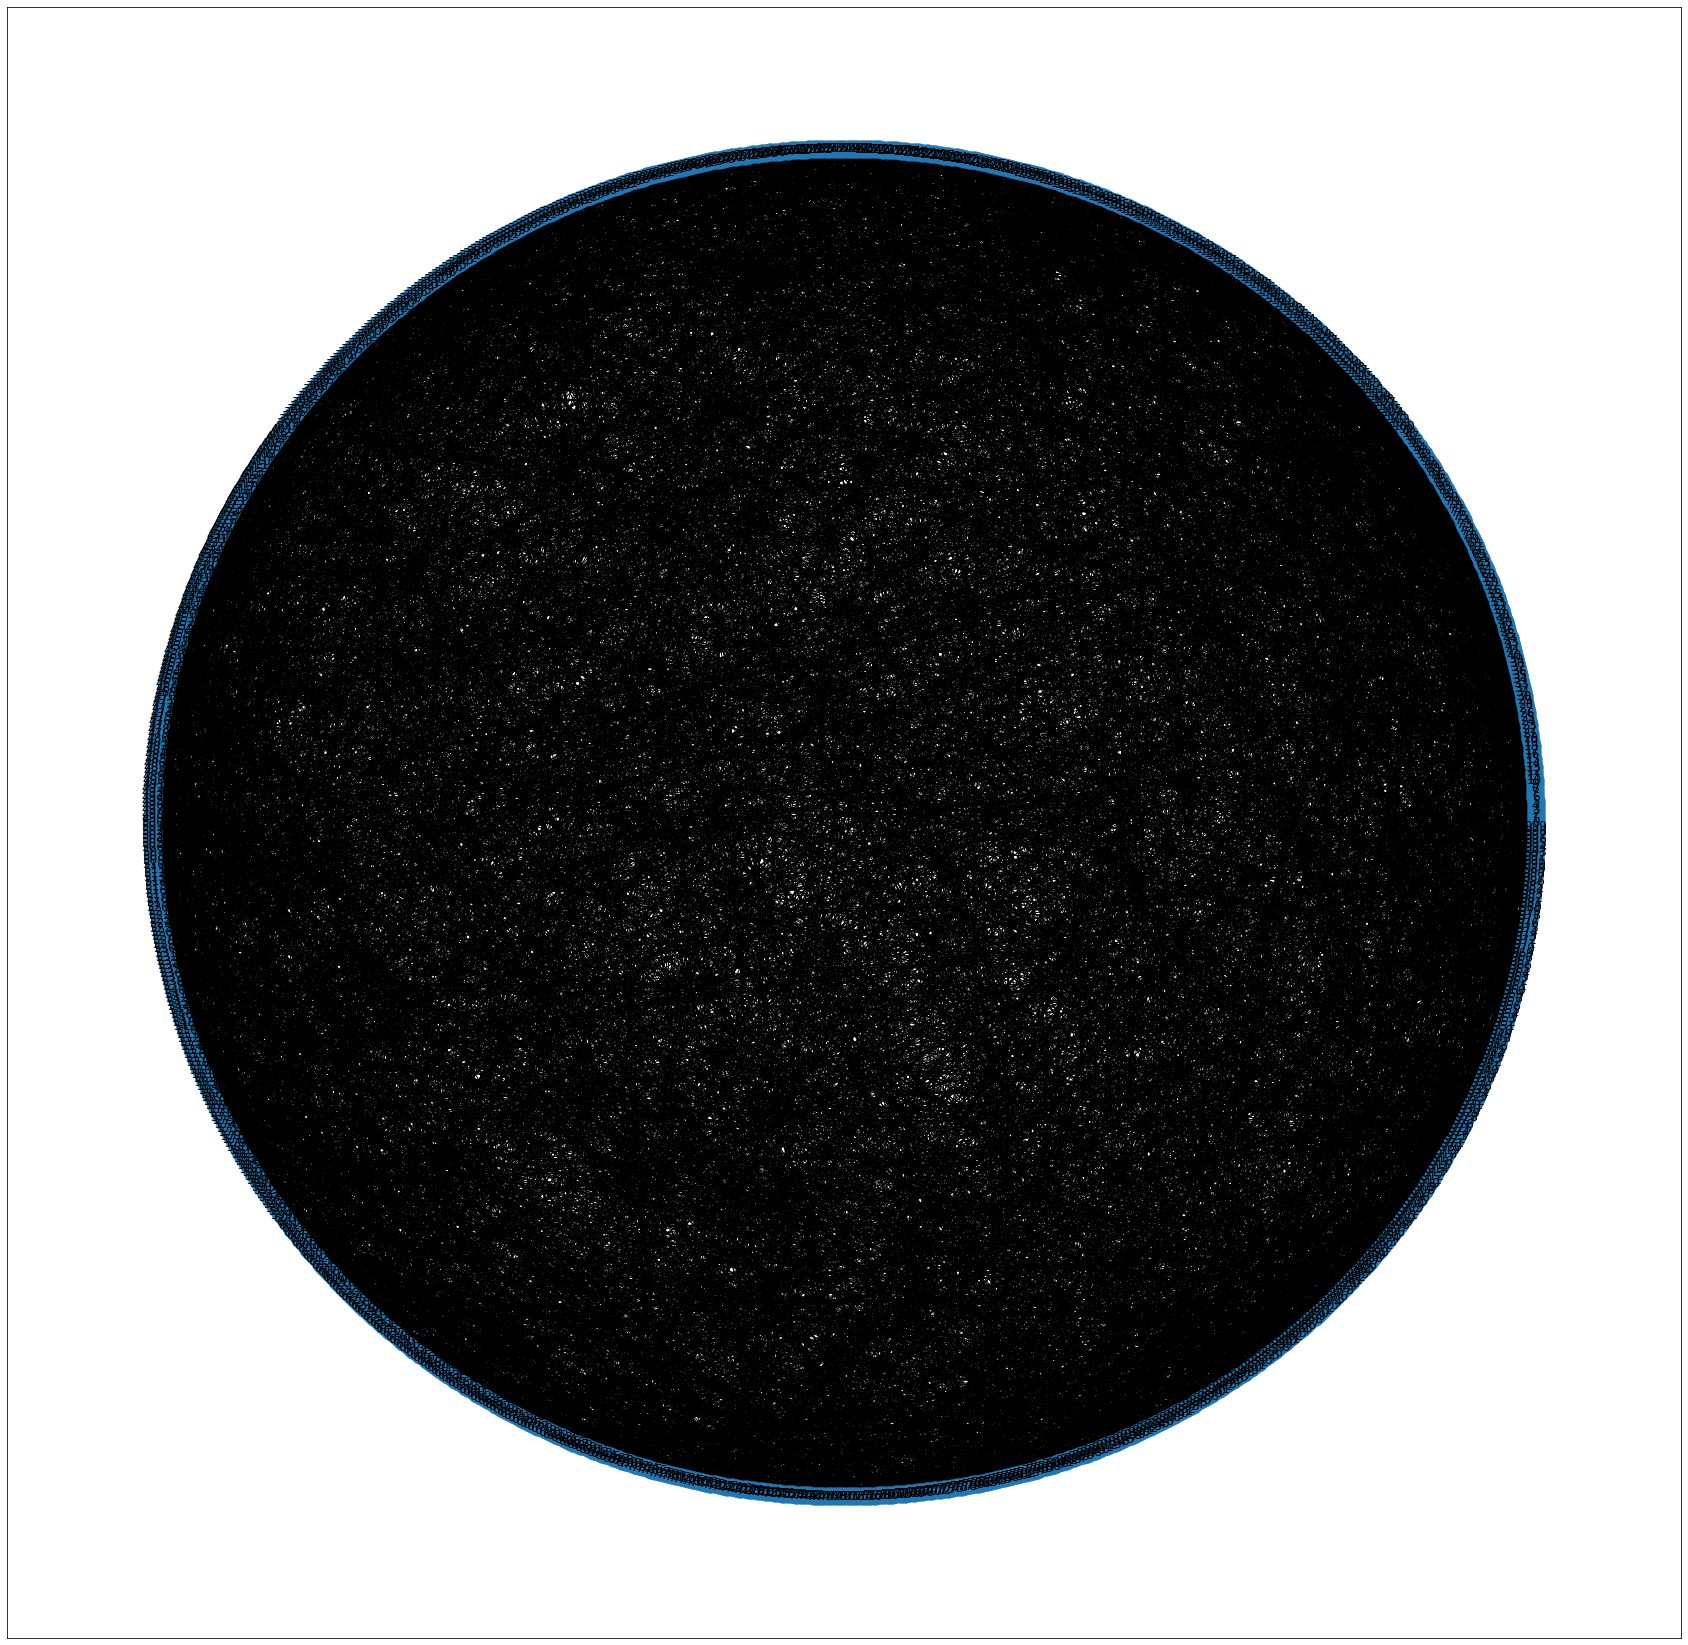

In [48]:
pos = nx.circular_layout(small_world_graph)
plt.figure(figsize = (30, 30))
nx.draw_networkx(small_world_graph, pos)

In [35]:
def icm(g, p, new_active):
    activated = set()
    for node in new_active:
#       print("Node " + str(node) + " activating: ")
      to_activate = []
      if (node not in activated) :
          to_activate += g.neighbors(node)
      
      rand = random.uniform(0, 1) #generates a floating point in [0, 1]
      for neighbor in to_activate :
        if rand <= p :
          activated.add(neighbor)

          # this activated neighbor node should activate its unactivated neighbors
          if neighbor not in new_active :
            new_active.append(neighbor)

#           print(neighbor)
#       print()
    return (activated)

In [38]:
def max_icm(g, p, k):
    # initialize the maximum activation set
    mas = set()
    
    # keep track of the activated nodes
    activated = set()
    
    while len(mas) < k:
        # find the node that would maximize the number of activated nodes if added to the MAS
        max_node = None
        max_activated = len(activated)
        
        for node in g.nodes():
            if node not in mas:
                activated_copy = activated.copy()
                to_activate = set(g.neighbors(node))
                
                # activate the neighbors of the node
                for neighbor in to_activate:
                    rand = random.uniform(0, 1)
                    if rand <= p:
                        activated_copy.add(neighbor)
                        
                # count the number of activated nodes
                num_activated = len(activated_copy)
                
                # update the maximum activation set
                if num_activated > max_activated:
                    max_node = node
                    max_activated = num_activated
        
        # stop the algorithm if adding a node to the MAS does not increase the number of activated nodes
        if max_node is None:
            break
        
        # add the node to the maximum activation set
        mas.add(max_node)
        
        # activate the neighbors of the node
        to_activate = set(g.neighbors(max_node))
        for neighbor in to_activate:
            rand = random.uniform(0, 1)
            if rand <= p:
                activated.add(neighbor)
    
    # return the maximum activation set
    return mas

In [29]:
twtseeds = random.sample(nodes, 10)
print(twtseeds)

swgseeds = random.sample(small_world_graph.nodes, 10)
print(swgseeds)

['kataria4ambala', 'vikrantkumar', 'Pvsindhu1', 'ShravanJhaji', 'DrSubhashMoS', 'BorisJohnson', 'ivishalthacker', 'isagarsinghbjp', 'achandwar', 'iChiragPaswan']
[203, 373, 213, 455, 634, 917, 345, 657, 900, 523]


C:\Users\Tatwamasi Mishra\AppData\Local\Temp\ipykernel_12368\1674486013.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  swgseeds = random.sample(small_world_graph.nodes, 10)


In [49]:
twt_icm = icm(twt_subgraph, 0.5, twtseeds)
print(len(twt_icm))

# icm_twt_subgraph = twt_subgraph.subgraph(twt_icm, 0.5, twtseeds)
# pos = nx.circular_layout(icm_twt_subgraph)
# plt.figure(figsize = (30, 30))
# nx.draw_networkx(icm_twt_subgraph, pos)

796


In [42]:
swg_icm = icm(small_world_graph, 0.5, swgseeds)
print(len(swg_icm))

888


In [43]:
micm_twt_seeds =  list(max_icm(twt_subgraph, 0.5, 10))
micm_twt = icm(twt_subgraph, 0.5, micm_twt_seeds)
print(len(micm_twt))

608


In [44]:
micm_swg_seeds =  list(max_icm(small_world_graph, 0.5, 10))
micm_swg = icm(twt_subgraph, 0.5, micm_twt_seeds)
print(len(micm_swg))

999
